# Test `regplot`

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import pygrutils.regplot as gr

## Basic usage

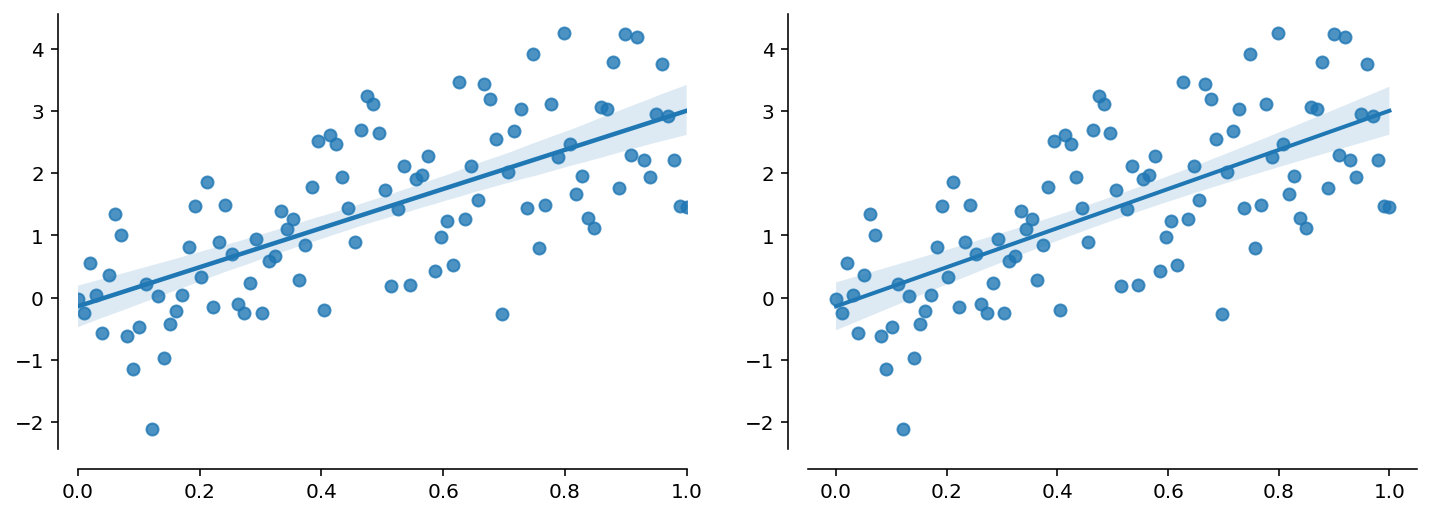

In [2]:
n = 100
alpha = 3.0
beta = -0.15
sigma = 1.0

rng = np.random.default_rng(0)
x = np.linspace(0, 1, n)
y = alpha * x + beta + sigma * rng.normal(size=n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=x, y=y, ax=ax1)
res = gr.regplot(x=x, y=y, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Custom plotting options

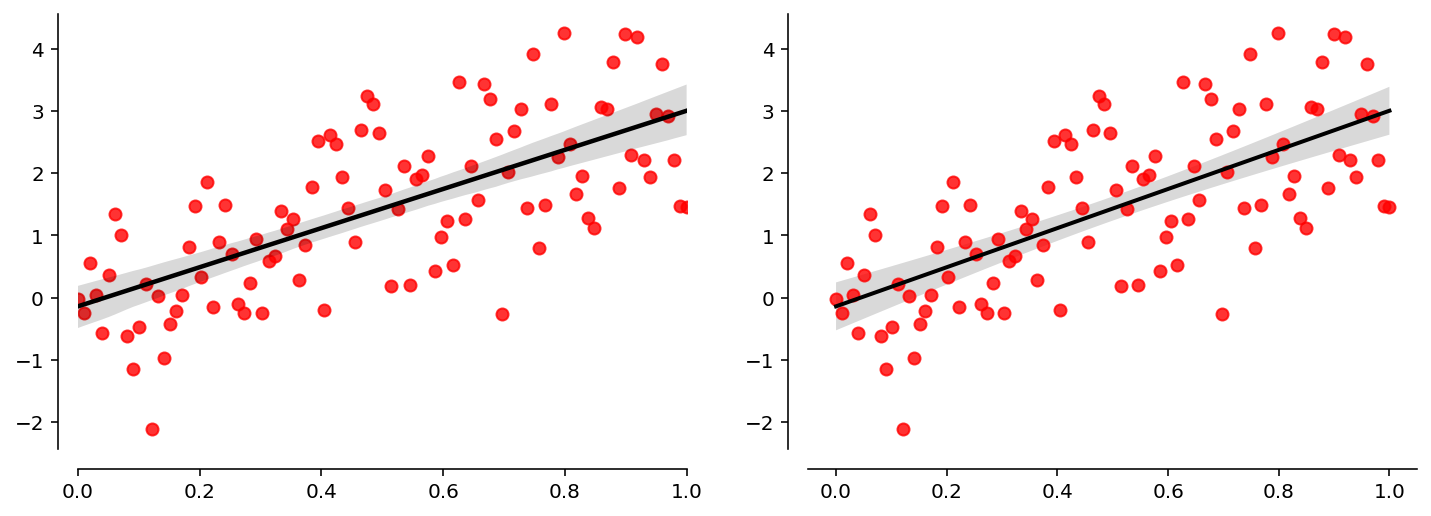

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

kwargs = {"scatter_kws": {"color": "r"}, "line_kws": {"color": "k"}}

sns.regplot(x=x, y=y, **kwargs, ax=ax1)
res = gr.regplot(x=x, y=y, **kwargs, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## `pygrutils`-specific plotting options

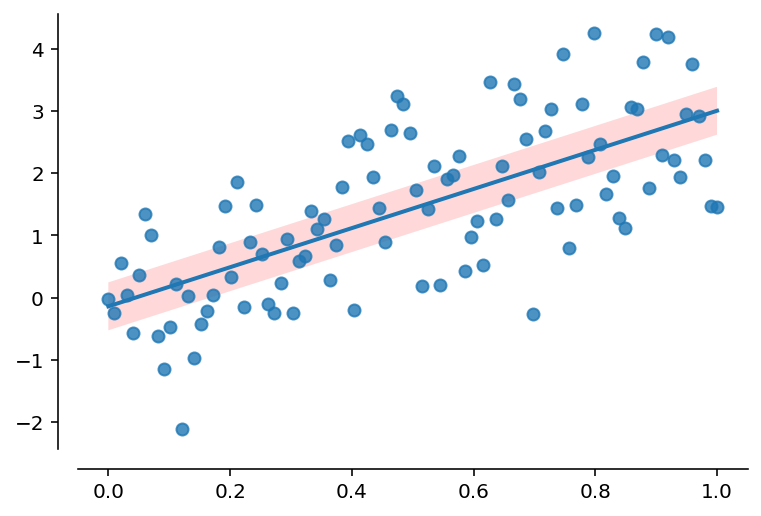

In [4]:
fig, ax = plt.subplots()

res = gr.regplot(x=x, y=y, ci_kws={"fc": "r"}, n_points=2, ax=ax)

sns.despine(offset=10, ax=ax)

## Robustness to few data points

`pygrutils.regplot` uses `statsmodels` for confidence-interval calculations. `seaborn` uses custom code. The two are similar but not exactly the same, especially when working with very few data points.

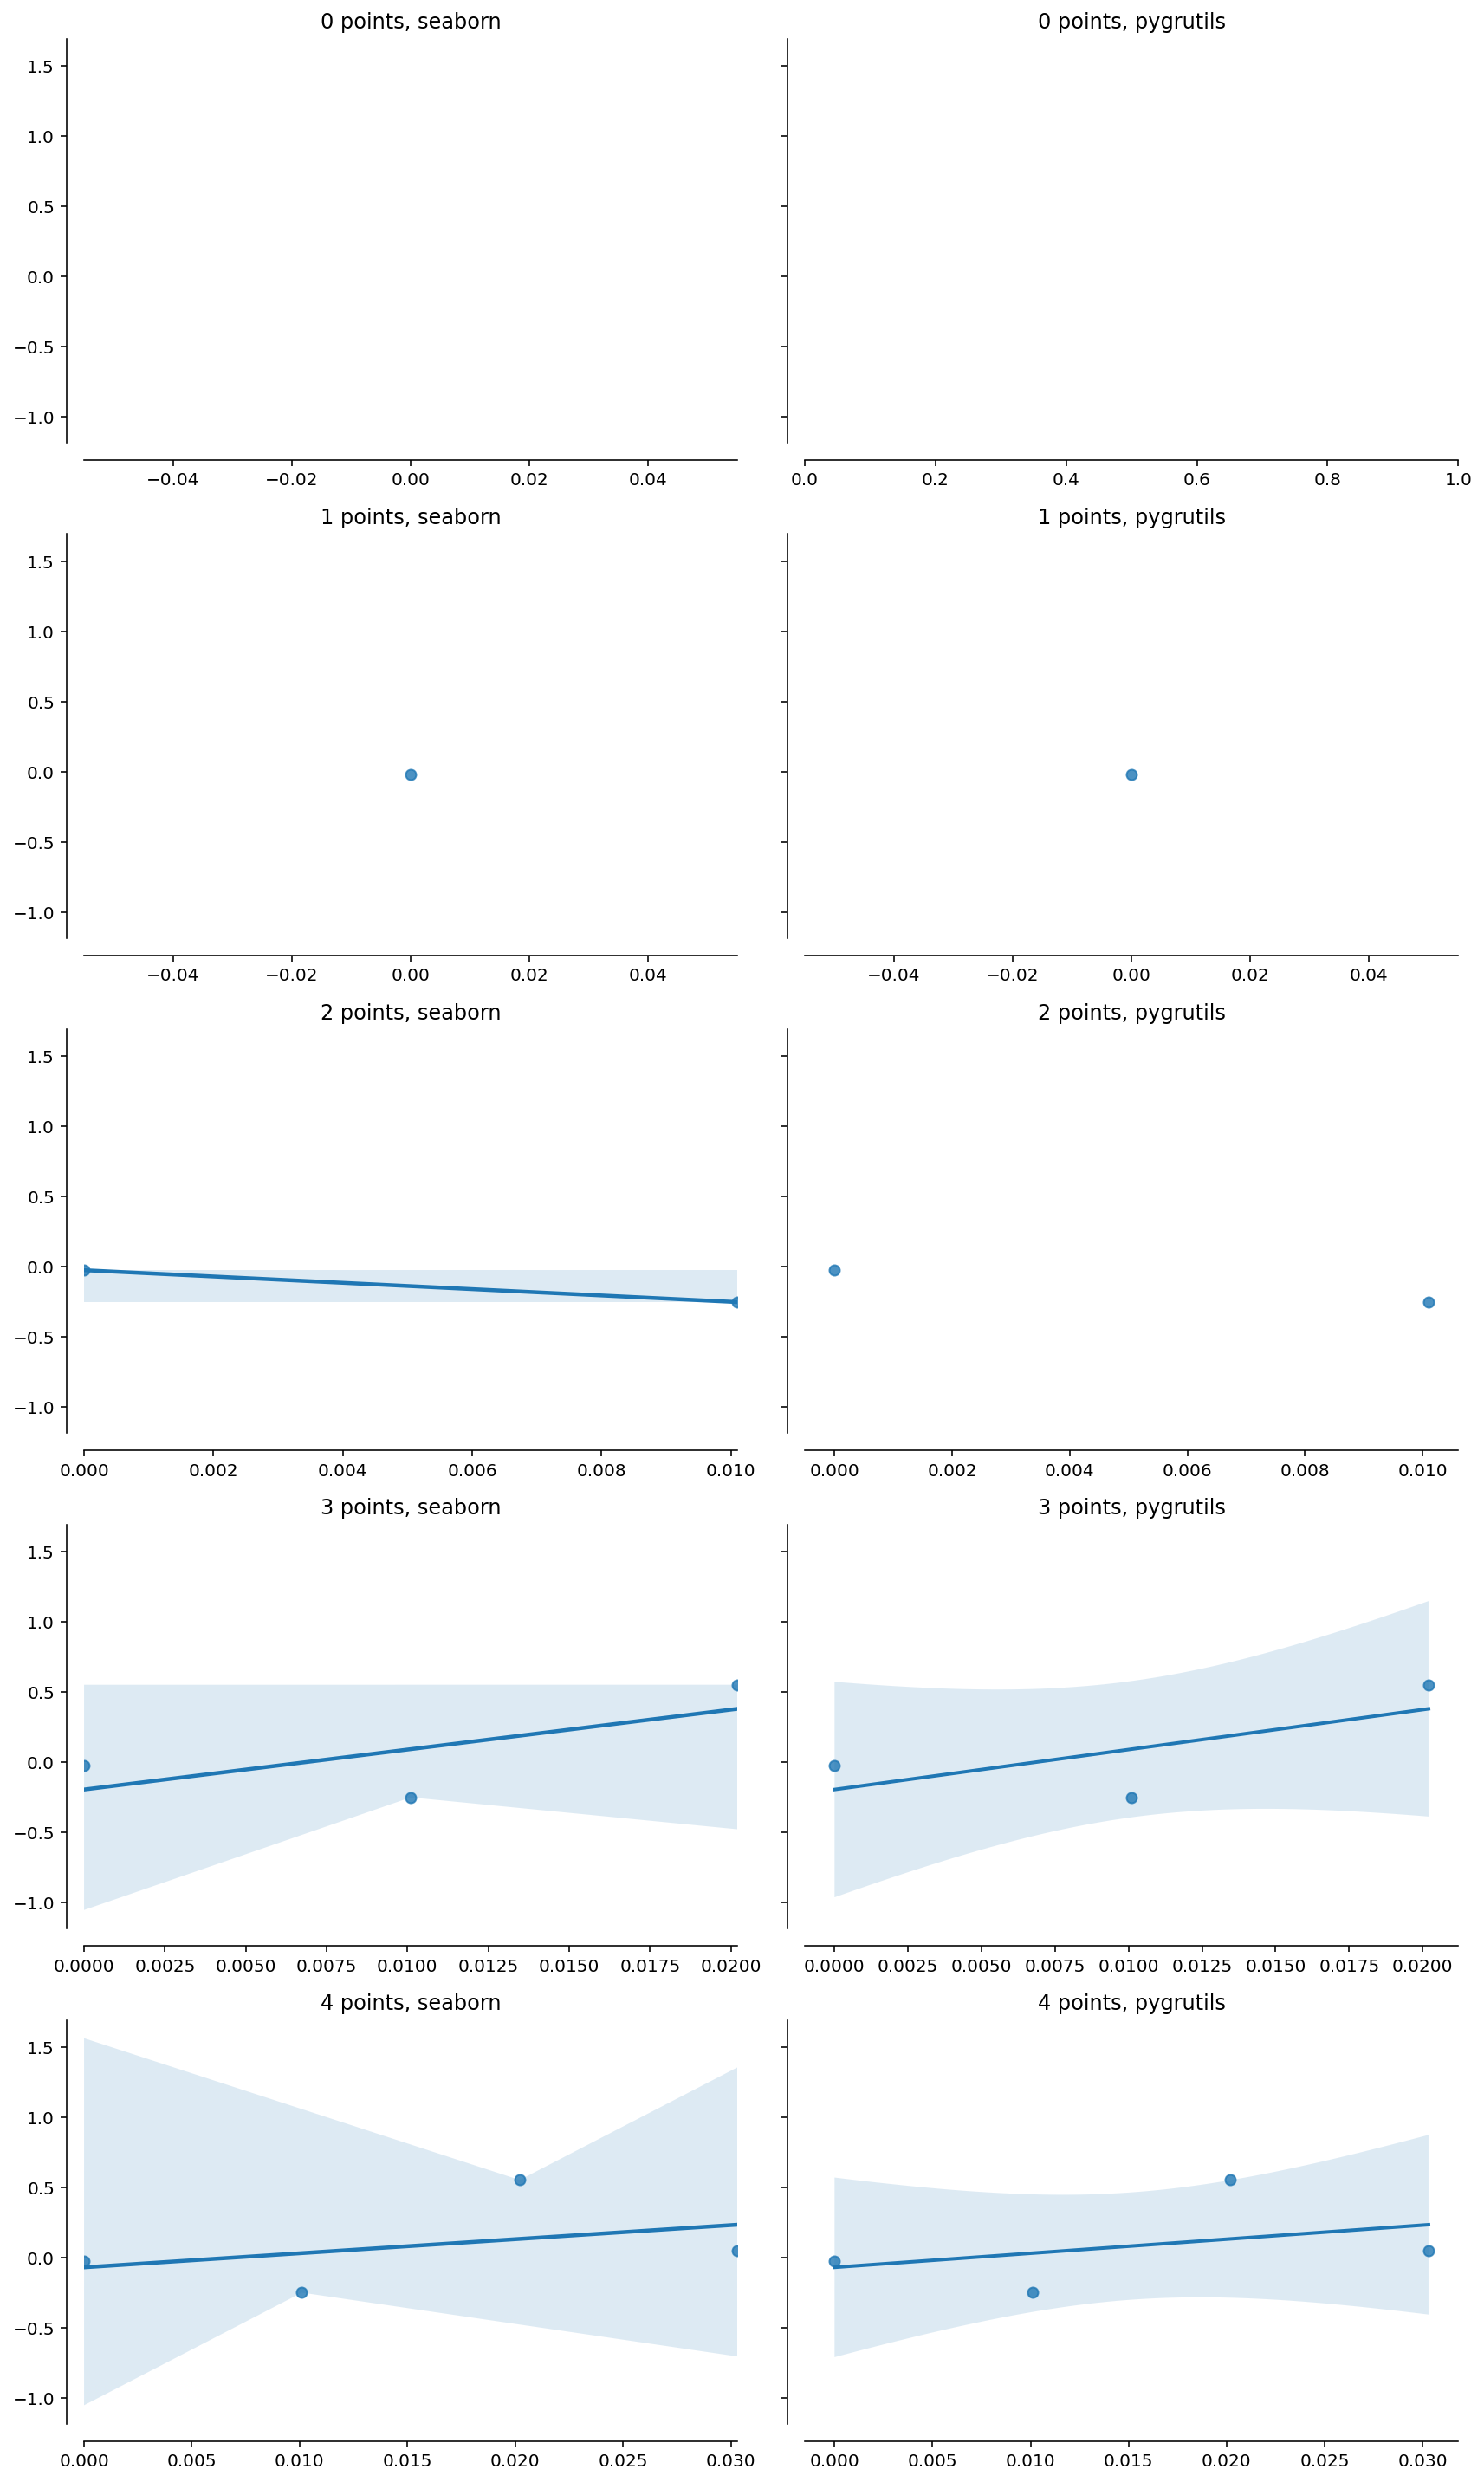

In [5]:
n_max = 5
fig, axs = plt.subplots(
    n_max, 2, figsize=(12, 4 * n_max), sharey=True, tight_layout=True
)

for i, crt_axs in enumerate(axs):
    crt_x = x[:i]
    crt_y = y[:i]

    sns.regplot(x=crt_x, y=crt_y, ax=crt_axs[0])
    gr.regplot(crt_x, crt_y, ax=crt_axs[1])

    for k, ax in enumerate(crt_axs):
        crt_name = ["seaborn", "pygrutils"][k]
        ax.set_title(f"{i} points, {crt_name}")
        sns.despine(offset=10, ax=ax)